In [1]:
import IPython.display as ipd
import numpy
import matplotlib.pyplot as plt

# Make a simple sine signal

In [14]:
sample_rate = 22050 # sample rate
Period = 2.0    # seconds
# Period = 0.02    # seconds
Frequency=440
x = numpy.linspace(0, Period, int(Period*sample_rate), endpoint=False) # time variable
y = 0.5*numpy.sin(2*numpy.pi*Frequency*x)                # pure sine wave at 440 Hz

# Plot signal

<IPython.core.display.Javascript object>


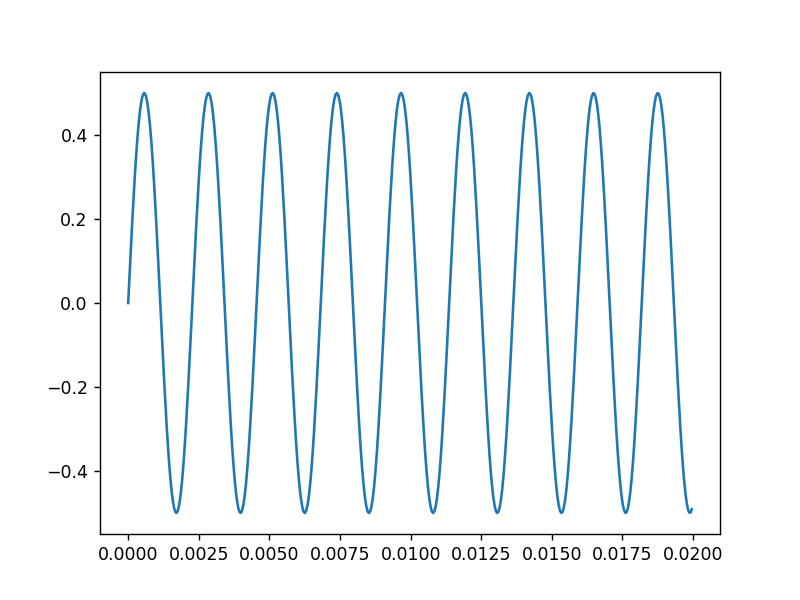

In [3]:
# %matplotlib inline
%matplotlib notebook
plt.figure(0)
plt.plot(x,y)
plt.show()

# Play Audio from signal

In [15]:
ipd.Audio(y, rate=sample_rate) # load a NumPy array

In [5]:
import librosa
import librosa.display

# Writing Audio to file

In [6]:
librosa.output.write_wav('audio/tone_440.wav', y, sample_rate)

# Reading Audio from file
If you receive an error with librosa.load, you may need to install ffmpeg.

https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg

In [7]:
y, sr = librosa.load('audio/tone_440.wav')

# FFT calculations

In [8]:
n = len(y) # length of the signal
k = numpy.arange(n)
T = n/sample_rate
frq = k/T # two sides frequency range
# print(frq)
frq = frq[range(n//2)] # one side frequency range
# print(frq)

In [9]:
Y = numpy.fft.fft(y)/n # fft computing and normalization

# print(Y)
Y = Y[range(n//2)]
# print(Y)

<IPython.core.display.Javascript object>


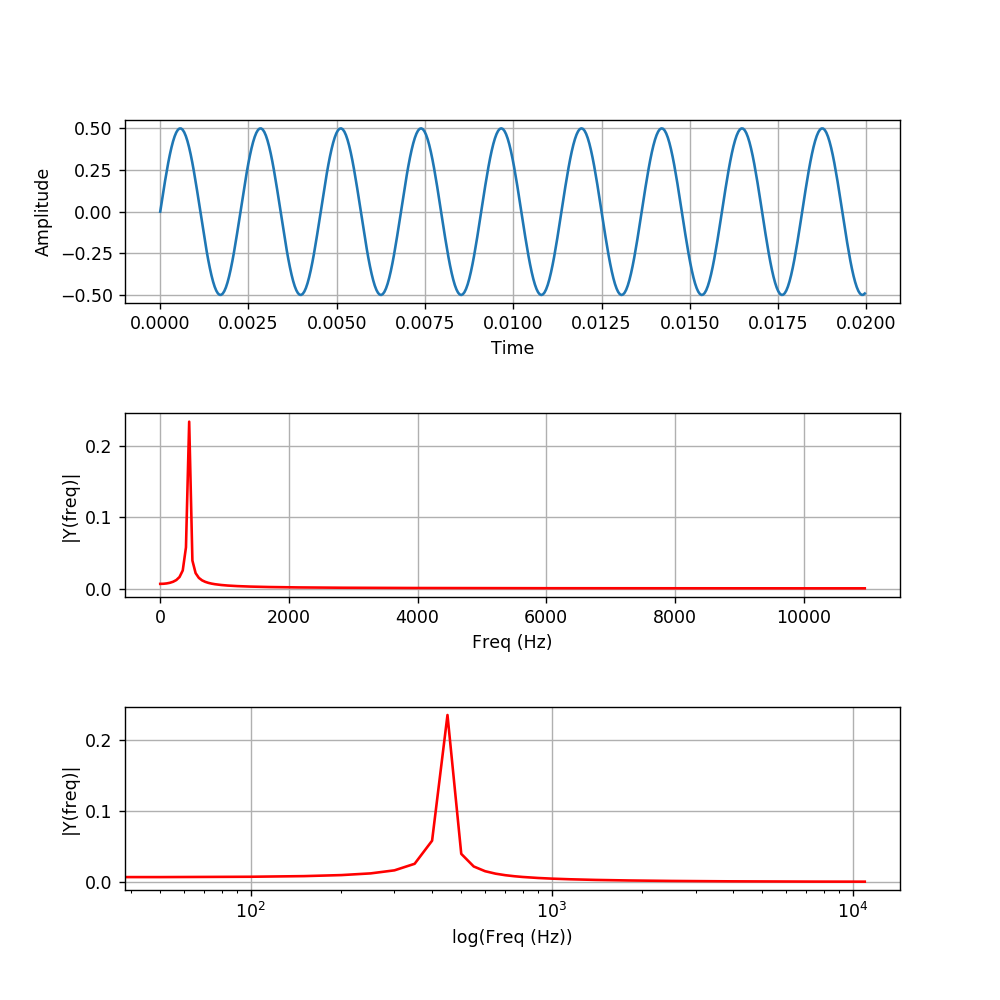

In [10]:
# fig=plt.figure(1)
fig, ax = plt.subplots(3, 1,figsize=(8,8))

# fig=plt.figure(1)
# ax = fig.add_subplot(3, 1, 1)

ax[0].grid(True)
ax[0].plot(x,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].grid(True)
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

ax[2].grid(True)
ax[2].semilogx(frq,abs(Y),'r') # plotting the spectrum
# ax[2].plot(10*numpy.log10(frq),abs(Y),'r') # plotting the spectrum
ax[2].set_xlabel('log(Freq (Hz))')
ax[2].set_ylabel('|Y(freq)|')
fig.subplots_adjust(hspace=0.6)

plt.show()

# Making complex signal

In [11]:
y1 = 0.5*numpy.sin(2*numpy.pi*500*x)                # pure sine wave at 500 Hz
y2 = 0.5*numpy.cos(2*numpy.pi*1000*x)                # pure cosine wave at 1000 Hz

<IPython.core.display.Javascript object>


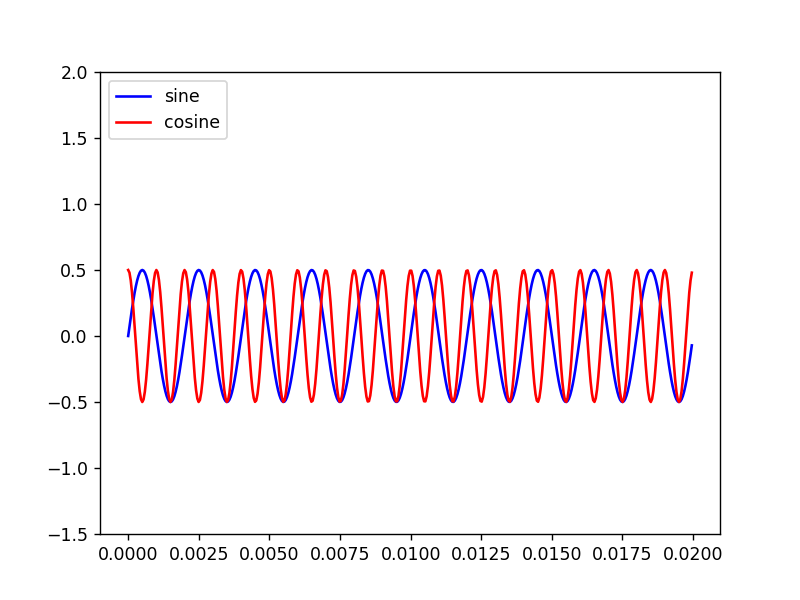

In [12]:
# %matplotlib inline
plt.figure(2)
plt.plot(x, y1, '-b', label='sine')
plt.plot(x, y2, '-r', label='cosine')
plt.legend(loc='upper left')
plt.ylim(-1.5, 2.0)
plt.show()

<IPython.core.display.Javascript object>


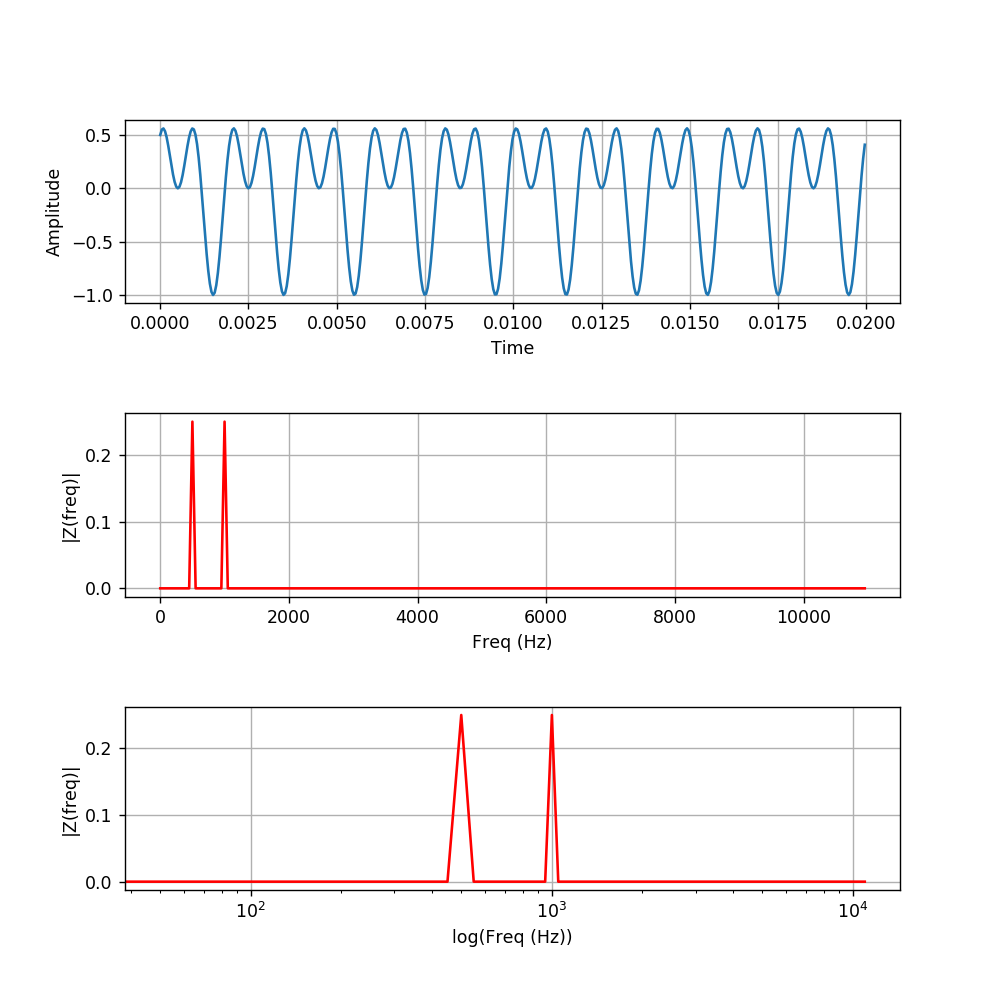

In [13]:
fig, ax = plt.subplots(3, 1,figsize=(8,8))

# fig=plt.figure(1)
# ax = fig.add_subplot(3, 1, 1)
z=numpy.add(y1,y2)
Z = numpy.fft.fft(z)/n # fft computing and normalization

# print(Y)
Z = Z[range(n//2)]

ax[0].grid(True)
ax[0].plot(x,z)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].grid(True)
ax[1].plot(frq,abs(Z),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Z(freq)|')

ax[2].grid(True)
ax[2].semilogx(frq,abs(Z),'r') # plotting the spectrum
# ax[2].plot(10*numpy.log10(frq),abs(Y),'r') # plotting the spectrum
ax[2].set_xlabel('log(Freq (Hz))')
ax[2].set_ylabel('|Z(freq)|')
fig.subplots_adjust(hspace=0.6)

plt.show()